Impoting libraries


In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

Importing dataset

In [2]:
df = pd.read_csv('news.csv')

Cleaning text

In [3]:
import re
import nltk
from nltk.corpus import stopwords
corpus = []

for i in range(0,len(df)):
    news = re.sub('[^a-zA-Z]',' ',df['text'][i]) 
    
    nes = news.lower() 

    news = news.split()


    all_stopwords = stopwords.words('english')

    news = ' '.join(news)

    corpus.append(news)

Vectorizing

In [4]:
vectorizer = TfidfVectorizer(max_df=0.7)
tfidf_news = vectorizer.fit_transform(corpus)
print(tfidf_news)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1991770 stored elements and shape (6335, 65180)>
  Coords	Values
  (0, 13559)	0.028433154168346464
  (0, 24137)	0.03763510334513633
  (0, 52202)	0.042529359338330755
  (0, 30459)	0.026225186830914706
  (0, 20560)	0.020030789809148027
  (0, 22058)	0.01866502914912241
  (0, 9056)	0.01600848940510785
  (0, 39051)	0.02626005020208672
  (0, 64669)	0.02848481770095716
  (0, 64182)	0.023989803184581427
  (0, 21487)	0.024574142529833656
  (0, 46374)	0.02215711263796541
  (0, 29558)	0.023746356441802834
  (0, 20894)	0.03624339734517066
  (0, 55426)	0.05468796379980533
  (0, 17779)	0.046708015393944646
  (0, 26142)	0.19637136863042745
  (0, 49322)	0.027719912403589723
  (0, 10333)	0.16832007033067964
  (0, 23724)	0.078158867241292
  (0, 62715)	0.06819813948944639
  (0, 20399)	0.547794603557834
  (0, 63982)	0.019258526682394757
  (0, 60811)	0.09043044267875124
  (0, 5129)	0.01574423459796949
  :	:
  (6334, 14556)	0.046761830526791046
 

Splitting the data

In [5]:
X_train,X_test,y_train,y_test = train_test_split(tfidf_news,df['label'],test_size=0.2,random_state=0)

Train the PassiveAgressiveClassifier Model

In [6]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

Predict on the test set

In [7]:
y_pred = classifier.predict(X_test)
print(y_pred)

['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'REAL' 'FAKE']


Calculate accuracy

In [8]:
score = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:93.21%


Creating confusion matrix

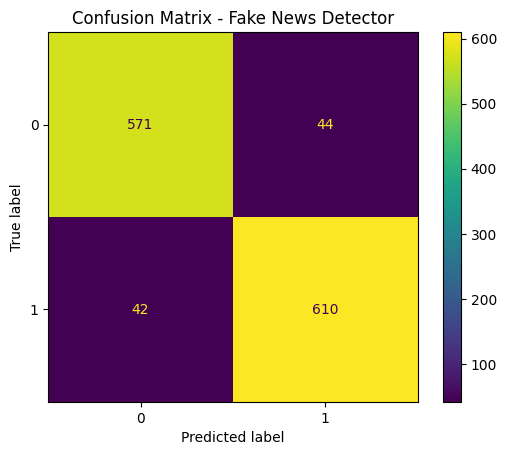

In [11]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix - Fake News Detector')
plt.show()
